# Name: Hania Rasheed
# Registration No: B23S0983DS009
# Program: BS DS - 23 (S)
# Date: 28 February, 2025

## ---------------------------------------------------------------------------------------------------------------


Before Starting the Scenario Task Implement all the code given in the manual and implement it on any image  


In [ ]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Basic Gray Level Transforms
#### Introduction

 Gray level transformations modify the intensity of pixels to enhance images. These transformations are crucial for contrast enhancement, brightness adjustment, and
 feature extraction.

 Why Use It?
 - Enhancing image visibility.
 - Improving contrast for medical imaging.
 - Preprocessing for feature detection in computer vision.

 ### Image Negative
 #### Introduction
 Image negative transformation inverts pixel values to enhance details in dark regions.

 Why Use It?
 - Enhancing X-rays.
 - Highlighting fine structures in images.

 #### Basic Syntax:
 negative = 255 - img


(-0.5, 302.5, 345.5, -0.5)

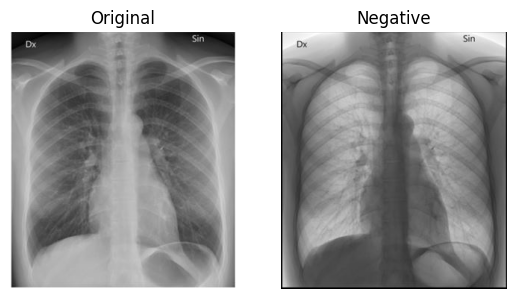

In [ ]:
img = cv2.imread('Medical_image.JPG')
negative = 255 - img

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap = 'gray')
plt.axis('off')


plt.subplot(1,2,2)
plt.title("Negative")
plt.imshow(negative, cmap = 'gray')
plt.axis('off')


### Log Transform
#### Introduction
 Log transformation enhances dark regions by compressing high intensity values.

 Why Use It?
 - Enhancing dark images.
 - Revealing hidden details in low-light images.

 #### Basic Syntax
 log_transformed = c * np.log(1 + img)

<ipython-input-78-d71662b2c14c>:2: RuntimeWarning: divide by zero encountered in log
  log_transformed = c*np.log(1+img)
<ipython-input-78-d71662b2c14c>:4: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.array(log_transformed, dtype = np.uint8)


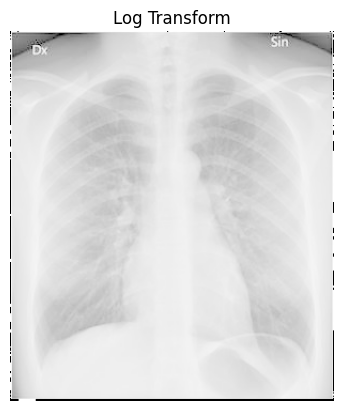

In [ ]:
c = 255 / np.log(1 + np.max(img))
log_transformed = c*np.log(1+img)

log_transformed = np.array(log_transformed, dtype = np.uint8)

plt.imshow(log_transformed, cmap = 'gray')
plt.title("Log Transform")
plt.axis('off')

plt.show()




### Gamma Transform
#### Introduction
 Gamma correction adjusts brightness using a power-law transformation.

Why Use It?
 - Enhancing images with varying lighting conditions.
 - Adjusting brightness in image processing.

 #### Basic Syntax:
 gamma_corrected = c * np.power(img, gamma)

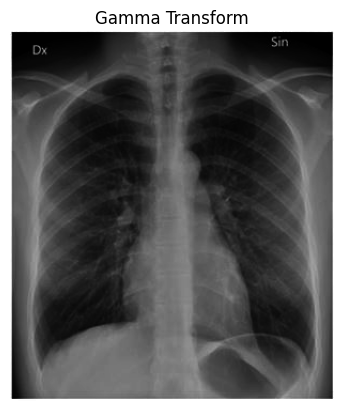

In [ ]:
gamma = 2.2
gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')

plt.imshow(gamma_corrected, cmap='gray')
plt.title("Gamma Transform")
plt.axis('off')

plt.show()

 ### Piecewise Linear Transforms
 #### Introduction
 Piecewise linear transformation maps intensity values using multiple linear functions.

 Why Use It?
 - Enhancing specific intensity ranges.
 - Customizing contrast enhancement.



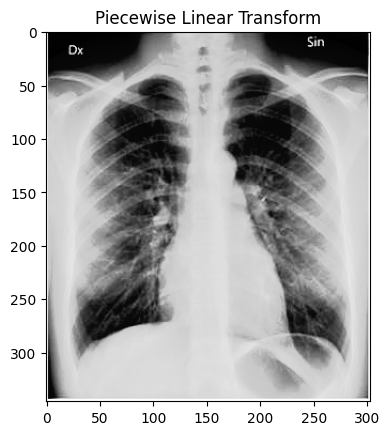

In [ ]:
r1,s1 = 70,10
r2,s2 = 140,200

def piecewise_linear_transform(pixel):
  if pixel < r1:
    return (s1/r1)*pixel
  elif pixel >= r1 and pixel < r2:
    return ((s2-s1)/(r2-r1))*(pixel-r1)+s1
  else:
    return ((255-s2)/(255-r2)) * (pixel - r2) +s2

vectorized_function = np.vectorize(piecewise_linear_transform)
transformed_img = vectorized_function(img).astype(np.uint8)

plt.imshow(transformed_img, cmap = 'gray')
plt.title("Piecewise Linear Transform")
plt.show()

### Contrast Stretching
#### Introduction
 Contrast stretching increases image contrast by spreading intensity values.

 Why Use It?
 - Enhancing low-contrast images.
 - Improving visibility of features.

 #### Basic Syntax:
 cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

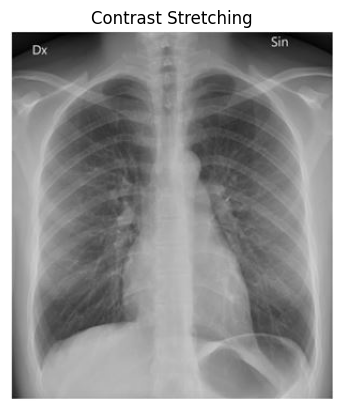

In [ ]:
stretched = cv2.normalize(img,None,0,255,cv2.NORM_MINMAX)

plt.imshow(stretched, cmap = 'gray')
plt.title("Contrast Stretching")
plt.axis('off')

plt.show()

### Thresholding
#### Introduction
 Thresholding converts grayscale images into binary images.

 Why Use It?
 - Object segmentation.
 - Extracting text from images.

 #### Basic Syntax:
 cv2.threshold(img, threshold_value, max_value, threshold_type)

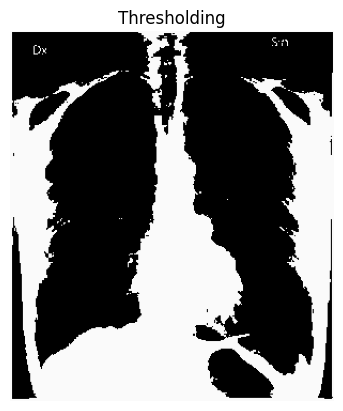

In [ ]:
_, binary = cv2.threshold(img, 150,250,cv2.THRESH_BINARY)

plt.imshow(binary, cmap='gray')
plt.title("Thresholding")
plt.axis('off')

plt.show()

### Window Slicing
#### Introduction
 Window slicing highlights certain intensity ranges while suppressing others.

 Why Use It?
 - Medical imaging.
 - Enhancing specific objects.

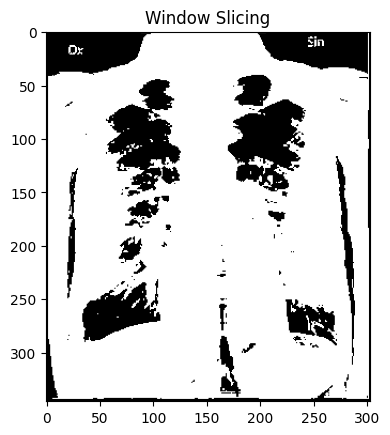

In [ ]:
min_range,max_range = 90,190
sliced_img = np.where((img>=min_range)&(img<= max_range),255,0).astype(np.uint8)

plt.imshow(sliced_img, cmap='gray')
plt.title("Window Slicing")
plt.show()

### Bit-Plane Slicing
#### Introduction
 Bit-plane slicing involves breaking down an image into its binary bit planes, where each bit represents a specific level of contribution to the overall image. For an 8 bit image, there are 8 planes (from the least significant bit (LSB) to the most significant bit (MSB)).

 Why Use It?
 - Highlights specific bits to understand their impact on the image.
 - Helps in analyzing image compression and watermarking techniques.
 - Useful for data hiding in digital images.


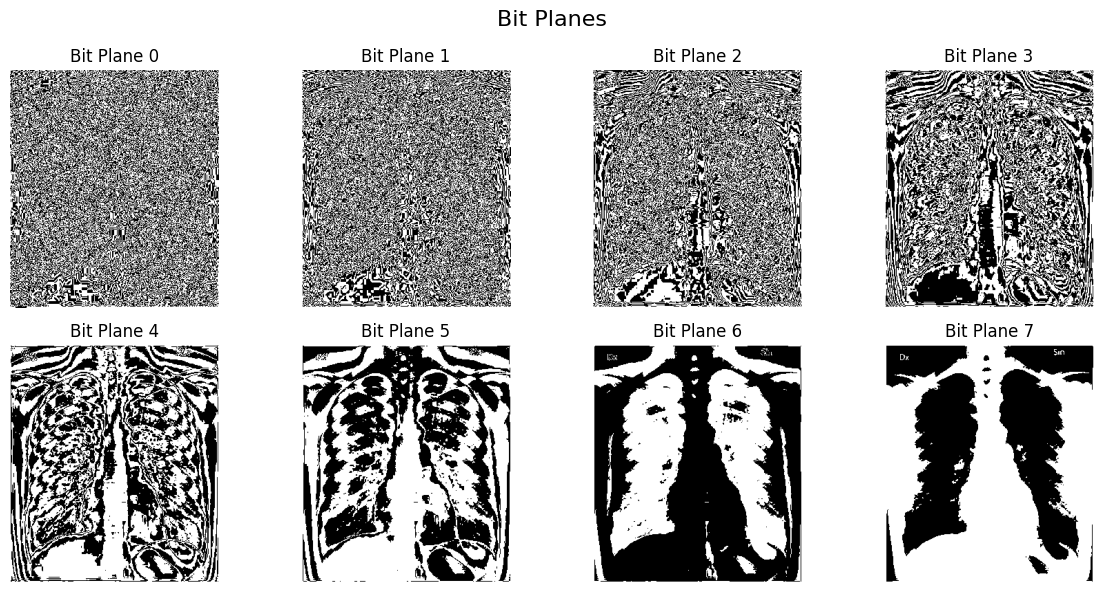

In [ ]:
image = cv2.imread('Medical_image.JPG',0)

rows, cols =image.shape

bit_planes = []
for i in range(8):
  bit_plane = (image & (1 << i)) >> i
  bit_planes.append(bit_plane*255)

fig, axes = plt.subplots(2,4,figsize = (12,6))
fig.suptitle("Bit Planes", fontsize = 16)

for i, ax in enumerate(axes.ravel()):
  ax.imshow(bit_planes[i], cmap= 'gray')
  ax.set_title(f'Bit Plane {i}')
  ax.axis('off')

plt.tight_layout()
plt.show()

with Using Cv2.bitwise_and operation

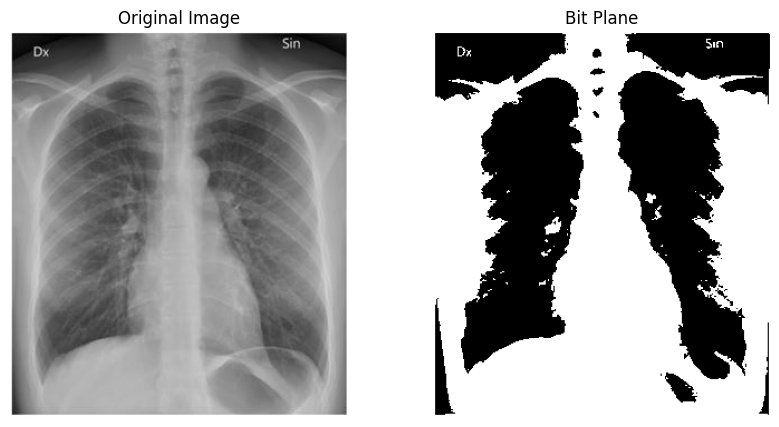

In [ ]:
image = cv2.imread('Medical_image.JPG',0)

mask = 1<<3
bit_plane - cv2.bitwise_and(image,mask)
bit_plane_scaled = (bit_plane >0).astype(np.uint8)*255

plt.figure(figsize =(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image, cmap = 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Bit Plane")
plt.imshow(bit_plane_scaled, cmap = 'gray')
plt.axis('off')
plt.show()

# Lab Task
### Scenario no 01 : Bit-Plane Slicing for Document Scanning

You are tasked with improving the readability of an old, scanned document. By isolating certain bit-planes, you
can extract text or enhance specific details.

Tasks:
1. Load a grayscale image of a scanned document.
2. Extract and visualize all 8 bit-planes.
3. Combine higher-order bit planes (e.g., 6th, 7th, and 8th) to create a new enhanced image of the document.
4. Compare the original image and the enhanced image.


#### Explanation:

We split the image in 8 planes, it is clearly seen that the 5th, 6th and 7th plane are visible. Then we combine the higher level planes using cv2.magnitude attribute.

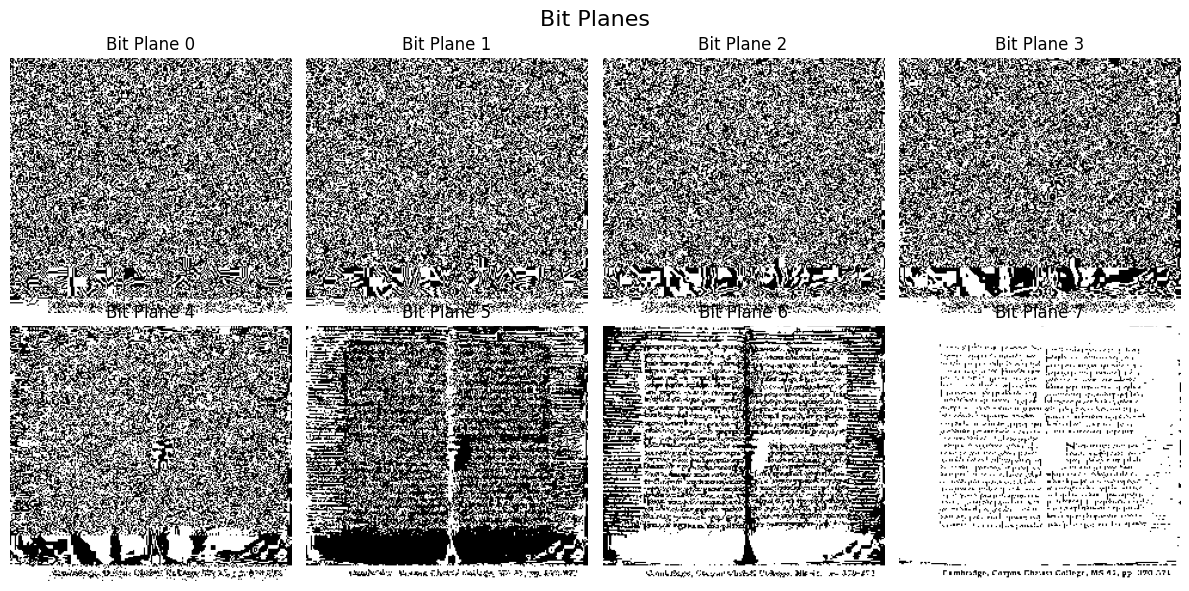

In [ ]:
image1 = cv2.imread('Scanerio 01.png',0)

rows, cols =image1.shape

bit_planes = []
for i in range(8):
  bit_plane = (image1 & (1 << i)) >> i
  bit_planes.append(bit_plane*255)

fig, axes = plt.subplots(2,4,figsize = (12,6))
fig.suptitle("Bit Planes", fontsize = 16)

for i, ax in enumerate(axes.ravel()):
  ax.imshow(bit_planes[i], cmap= 'gray')
  ax.set_title(f'Bit Plane {i}')
  ax.axis('off')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Bit Plane 7 Image')

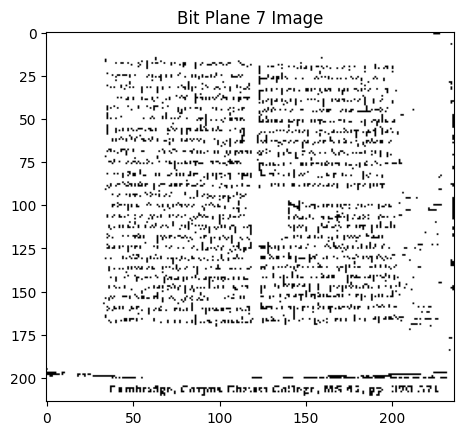

In [ ]:
plt.imshow(bit_planes[7], cmap='gray')
plt.title('Bit Plane 7 Image')

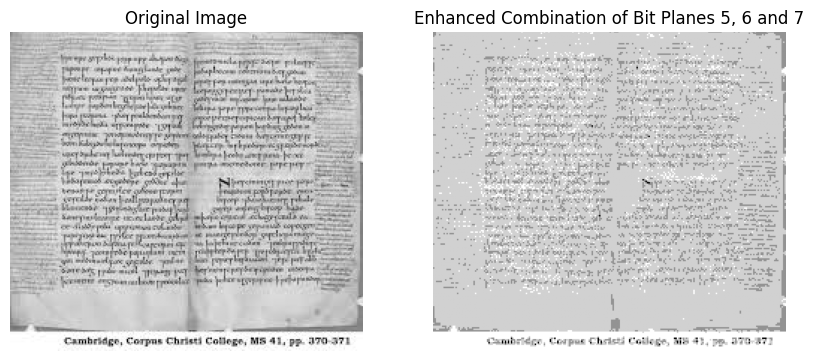

In [ ]:
plane1 = cv2.magnitude(bit_planes[6].astype(np.float32), bit_planes[7].astype(np.float32))
plane2 = cv2.magnitude(bit_planes[5].astype(np.float32), plane1)

plt.figure(figsize =(10,5))
plt.subplot(1,2,1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(plane2, cmap='gray')
plt.title('Enhanced Combination of Bit Planes 5, 6 and 7')
plt.axis('off')


plt.show()

### Scenario 02: Transformation Functions for Night-Time Image Brightening

Tasks:

1. Apply a logarithmic transformation to brighten the image.
2. Apply a gamma correction to further enhance the image.
3. Compare the results of both transformations.


Hint:
- Log transformation Formula :  
log_transformed = cv2.normalize(np.log1p(image), None, 0, 255, cv2.NORM_MINMAX dtype=cv2.CV_8U)
- Gamma Corelation Formula:
gamma_corrected = np.array(255 * (image / 255) ** (1 / gamma), dtype='uint8')

#### Explanation:
By using log transformation we can brighten the image. Furthermore we use gamma correction to enhance the image by using value of gamma as 0.2. The results show the image that is easier to analyse.


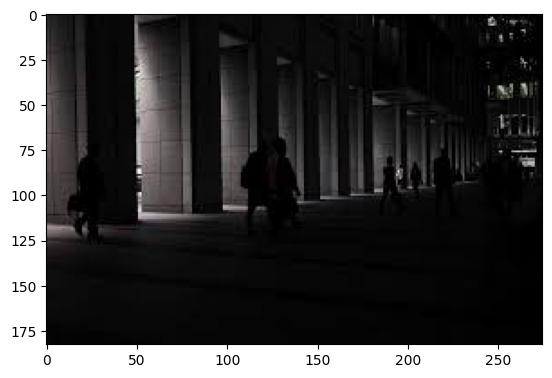

In [ ]:
image2 = cv2.imread('Scanerio 02.jpg', cv2.COLOR_BGR2GRAY)
plt.imshow(image2)

(183, 275, 3)


<ipython-input-4-afaea50461d1>:2: RuntimeWarning: divide by zero encountered in log
  log_transformed1 = c*np.log(1+image2)
<ipython-input-4-afaea50461d1>:4: RuntimeWarning: invalid value encountered in cast
  log_transformed1 = np.array(log_transformed1, dtype = np.uint8)


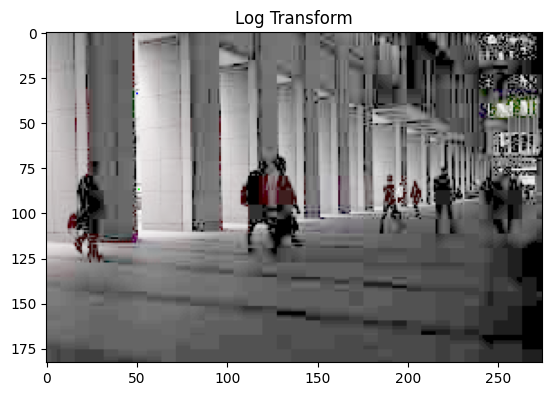

In [ ]:
c = 255 / np.log(1 + np.max(image2))
log_transformed1 = c*np.log(1+image2)

log_transformed1 = np.array(log_transformed1, dtype = np.uint8)
print(log_transformed1.shape)
plt.imshow(log_transformed1, cmap = 'gray')
plt.title("Log Transform")
plt.show()


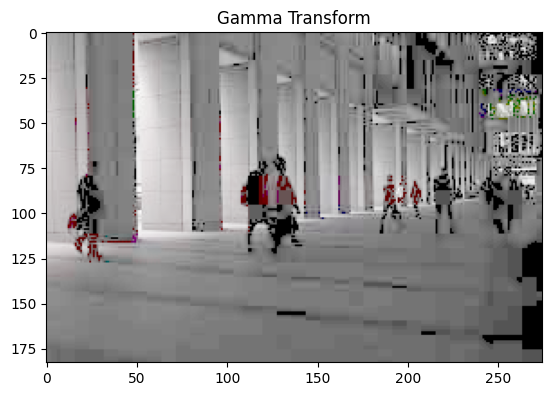

In [ ]:
gamma = 0.2
gamma_corrected = np.array(255*(image2 / 255) ** gamma, dtype = 'uint8')

plt.imshow(gamma_corrected, cmap='gray')
plt.title("Gamma Transform")
plt.show()

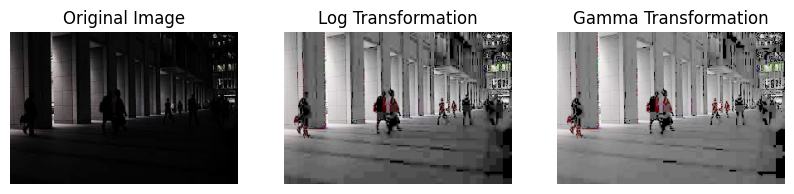

In [ ]:
plt.figure(figsize =(10,5))
plt.subplot(1,3,1)
plt.imshow(image2, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(log_transformed1, cmap='gray')
plt.title('Log Transformation')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(gamma_corrected, cmap='gray')
plt.title('Gamma Transformation')
plt.axis('off')


plt.show()

### Scenario 03: Enhancing Old Manuscripts for Digital Archiving

Libraries and museums often digitize old manuscripts for preservation. However, these documents may have
faded ink, uneven lighting, and noise that make them hard to read.  

Tasks:  

1. Use log transformation to enhance faded text.  
2. Apply gray-level transformation to balance lighting.  
3. Apply contrast stretching to improve readability.  
4. Use thresholding to remove the background and extract text.  

Hint:  
- Log transformation is useful when the document has faded ink.  

#### Explanation:

Using log transformation we enhance faded text. In terms of gray level transformations, we use piecewise linear transform to enhance the image. Contrast stretching improves readibility and thresholding removes background to extract text.


<ipython-input-89-3ceb47db0485>:2: RuntimeWarning: divide by zero encountered in log
  log_transformed3 = c*np.log(1+image1)
<ipython-input-89-3ceb47db0485>:4: RuntimeWarning: invalid value encountered in cast
  log_transformed3 = np.array(log_transformed3, dtype = np.uint8)


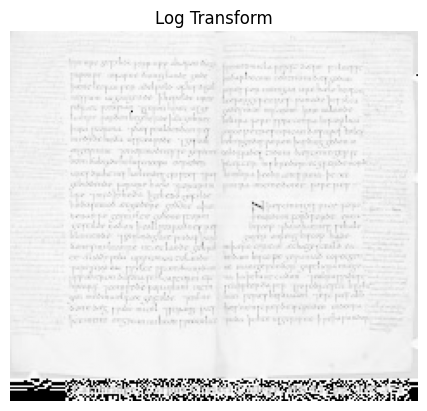

In [ ]:
c = 255 / np.log(1 + np.max(image1))
log_transformed3 = c*np.log(1+image1)

log_transformed3 = np.array(log_transformed3, dtype = np.uint8)

plt.imshow(log_transformed3, cmap = 'gray')
plt.title("Log Transform")
plt.axis('off')
plt.show()



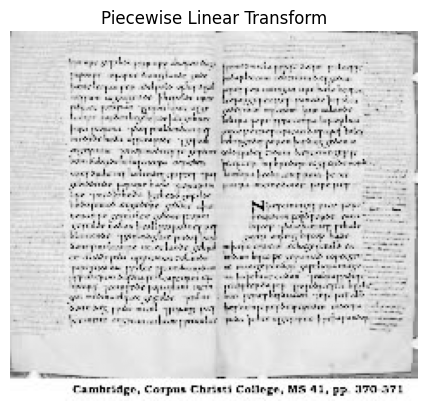

In [ ]:
r1,s1 = 90,10
r2,s2 = 150,200

def piecewise_linear_transform(pixel):
  if pixel < r1:
    return (s1/r1)*pixel
  elif pixel >= r1 and pixel < r2:
    return ((s2-s1)/(r2-r1))*(pixel-r1)+s1
  else:
    return ((255-s2)/(255-r2)) * (pixel - r2) +s2

vectorized_function = np.vectorize(piecewise_linear_transform)
transformed_img = vectorized_function(image1).astype(np.uint8)

plt.imshow(transformed_img, cmap = 'gray')
plt.title("Piecewise Linear Transform")
plt.axis('off')
plt.show()

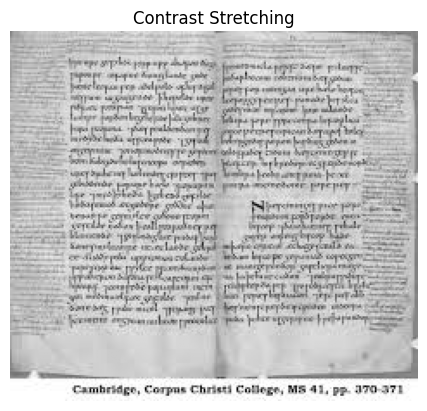

In [ ]:
stretched3 = cv2.normalize(image1,None,0,255,cv2.NORM_MINMAX)

plt.imshow(stretched3, cmap = 'gray')
plt.title("Contrast Stretching")
plt.axis('off')

plt.show()

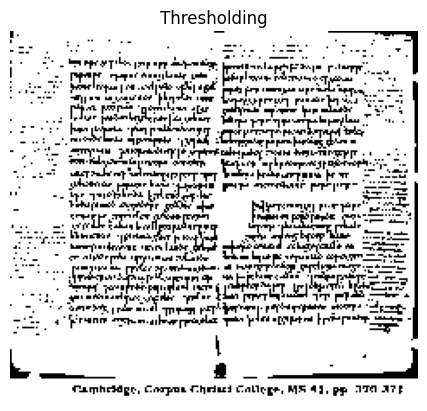

In [ ]:
_, binary3 = cv2.threshold(image1, 160,250,cv2.THRESH_BINARY)

plt.imshow(binary3, cmap='gray')
plt.title("Thresholding")
plt.axis('off')
plt.show()

### Scenario 04: License Plate Recognition in Traffic Monitoring

 A traffic monitoring system needs to automatically recognize license plates from surveillance footage.
However, due to varying lighting conditions, some license plates appear too dark or too bright.  

Tasks:  
1. Convert image to grayscale.  
2. Apply gray level transformation to improve visibility.  
3. Use thresholding function to separate text from the background.  
4. Apply log transformation to enhance low-light images.

#### Explanation:

We first convert the image to grayscale by using cv2.COLOR_BR2GRAY and then use window slicing to improve visibility. Afterwards we use thresholding function to make the number plate more visible and finally apply log transformation to enhance the low light parts.

(-0.5, 767.5, 431.5, -0.5)

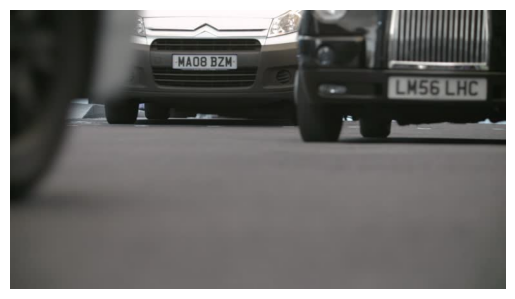

In [ ]:
image4 = cv2.imread('Scanerio 04.png', cv2.COLOR_BGR2GRAY)
plt.imshow(image4)
plt.axis('off')


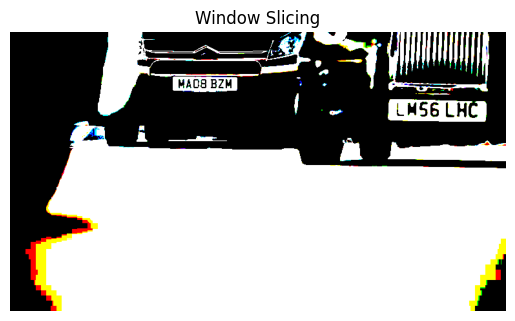

In [ ]:
min_range,max_range = 90,190
sliced_img1 = np.where((image4>=min_range)&(image4<= max_range),255,0).astype(np.uint8)

plt.imshow(sliced_img1, cmap='gray')
plt.title("Window Slicing")
plt.axis('off')

plt.show()

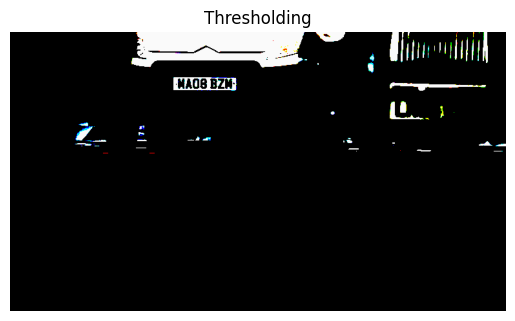

In [ ]:
_, binary4 = cv2.threshold(image4, 140,250,cv2.THRESH_BINARY)

plt.imshow(binary4, cmap='gray')
plt.title("Thresholding")
plt.axis('off')

plt.show()

<ipython-input-101-1340b91d0dcd>:2: RuntimeWarning: divide by zero encountered in log
  log_transformed4 = c*np.log(1+image4)
<ipython-input-101-1340b91d0dcd>:4: RuntimeWarning: invalid value encountered in cast
  log_transformed4 = np.array(log_transformed4, dtype = np.uint8)


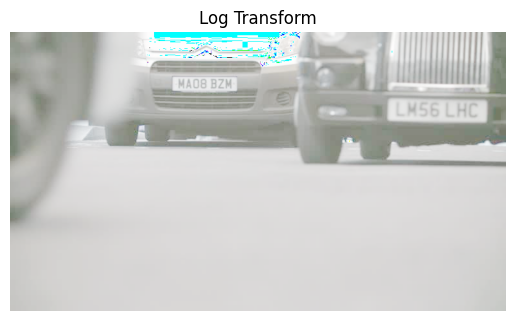

In [ ]:
c = 255 / np.log(1 + np.max(image4))
log_transformed4 = c*np.log(1+image4)

log_transformed4 = np.array(log_transformed4, dtype = np.uint8)

plt.imshow(log_transformed4, cmap = 'gray')
plt.title("Log Transform")
plt.axis('off')

plt.show()
